Understanding the Data
Reading the Data in
Multiple Regression Model
Prediction
Practice

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [47]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'

In [73]:
df = pd.read_csv(path) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


Let's select some features that we want to use for regression.

In [49]:
cdf = df [['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


Let's visualize the distribution of our features

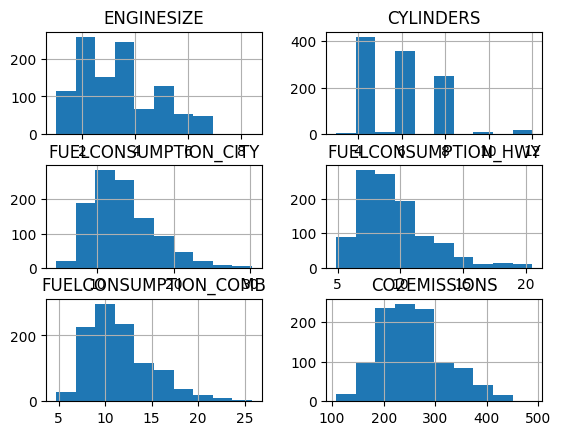

In [50]:
viz = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]]
viz.hist()
plt.show()

Let's plot Emission values with respect to all our features:

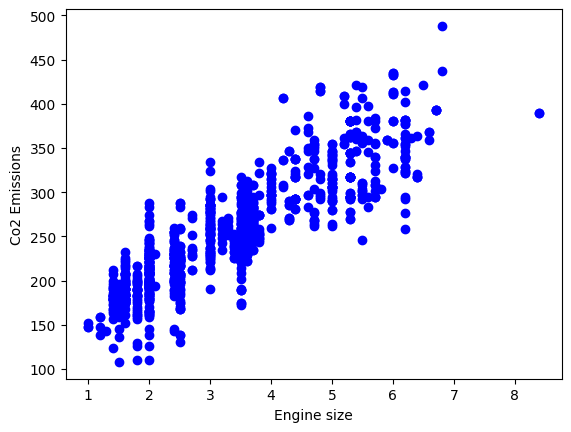

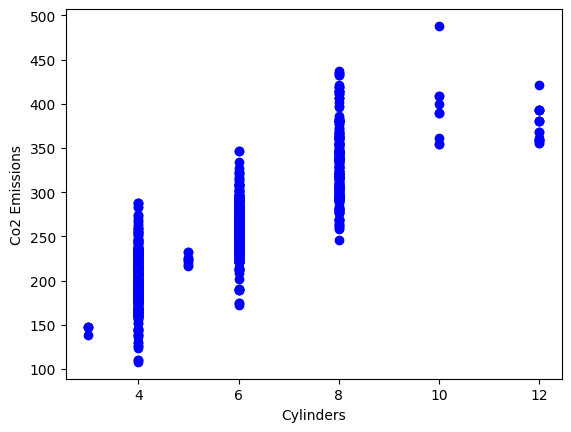

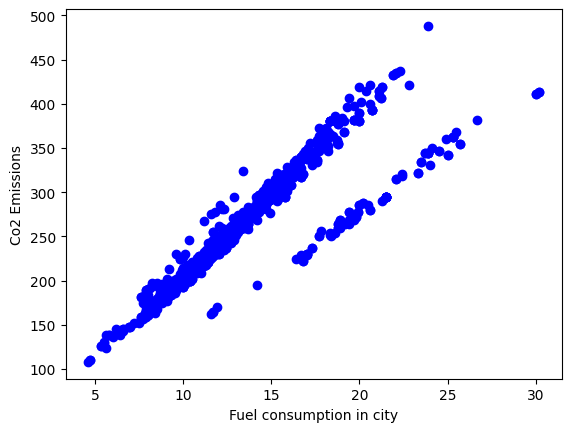

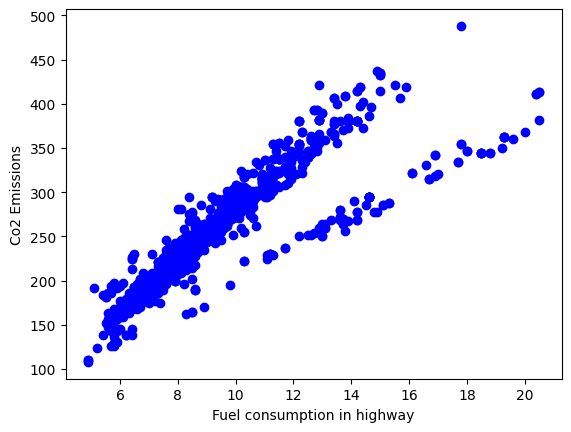

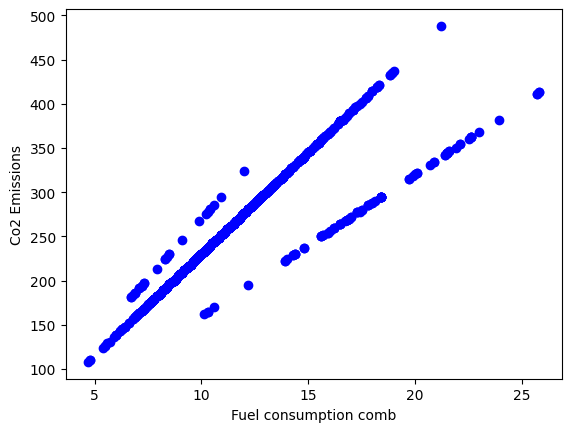

In [51]:
# Engine size vs co2 emissions
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine size')
plt.ylabel('Co2 Emissions')
plt.show()

# Cylinders vs co2 emissions
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Cylinders')
plt.ylabel('Co2 Emissions')
plt.show()

# Fuel consumption in city vs co2 emissions
plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Fuel consumption in city')
plt.ylabel('Co2 Emissions')
plt.show()

# Fuel consumption in high ways vs co2 emissions
plt.scatter(cdf.FUELCONSUMPTION_HWY, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Fuel consumption in highway')
plt.ylabel('Co2 Emissions')
plt.show()

# Fuel consumption comb ways vs co2 emissions
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Fuel consumption comb')
plt.ylabel('Co2 Emissions')
plt.show()

#### Creating train and test dataset

In [52]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [53]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
print("Coefficients: ", regr.coef_)
print("Intercepts ", regr.intercept_)

Coefficients:  [[10.99497373  7.47357822  9.46682067]]
Intercepts  [66.43014181]


#### Let's make predictions

In [54]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

y_prediction = regr.predict(test_x)
print("Prediction: ", y_prediction[0])

print("R2-Score, ", r2_score(test_y, y_prediction))
print("Explained variance, ", regr.score(test_x, test_y))
print("Mean absolute error, MAE: %.2f" % np.mean(np.absolute(test_y - y_prediction)))
print("Residual sum of squres, MSE: %.2f" % np.mean((y_prediction - test_y) ** 2))


Prediction:  [213.59387006]
R2-Score,  0.8585012739582332
Explained variance,  0.8585012739582332
Mean absolute error, MAE: 18.24
Residual sum of squres, MSE: 638.93


#### Use FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB to predict CO2EMISSIONS

In [64]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x_2 = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
train_y_2 = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x_2, train_y_2)
print("Coefficients: ", regr.coef_)
print("Intercepts ", regr.intercept_)

Coefficients:  [[11.14605511  6.89981855  6.59531218  2.42734588]]
Intercepts  [68.21244718]


#### Let's make predictions

In [72]:
from sklearn.metrics import r2_score

test_x_2 = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
test_y_2 = np.asanyarray(test[['CO2EMISSIONS']])

y_prediction_2 = regr.predict(test_x_2)
print("Prediction: ", y_prediction_2[0])

print("R2-Score, ", r2_score(test_y_2, y_prediction_2))
print("Explained variance, ", regr.score(test_x_2, test_y_2))
print("Mean absolute error, MAE: %.2f" % np.mean(np.absolute(test_y_2 - y_prediction_2)))
print("Residual sum of squres, MSE: %.2f" % np.mean((y_prediction_2 - test_y_2) ** 2))

Prediction:  [215.12031338]
R2-Score,  0.8572062985811042
Explained variance,  0.8572062985811042
Mean absolute error, MAE: 18.25
Residual sum of squres, MSE: 644.78
